<a href="https://colab.research.google.com/github/hkumarks/Deep_Learning/blob/main/Dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',
                               origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
                               extract=True)

68608000/68606236 [==============================] - 0s 0us/step


In [5]:
dir_arc=os.path.dirname(zip_dir)
!find $dir_arc -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [6]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'validation')

In [7]:
train_cat_dir=os.path.join(train_dir,'cats')
train_dog_dir=os.path.join(train_dir,'dogs')
test_cat_dir=os.path.join(test_dir,'cats')
test_dog_dir=os.path.join(test_dir,'dogs')

In [8]:
num_cats_tr = len(os.listdir(train_cat_dir))
num_dogs_tr = len(os.listdir(train_dog_dir))

num_cats_val = len(os.listdir(test_cat_dir))
num_dogs_val = len(os.listdir(test_dog_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print(f'No. of cats image in training= {len(os.listdir(train_cat_dir))}')
print(f'No. of dogs image in training= {len(os.listdir(train_dog_dir))}')
print()
print(f'No. of cats image for testing= {len(os.listdir(test_cat_dir))}')
print(f'No. of cats image for testing= {len(os.listdir(test_cat_dir))}')

No. of cats image in training= 1000
No. of dogs image in training= 1000

No. of cats image for testing= 500
No. of cats image for testing= 500


In [32]:
train_image_generator=ImageDataGenerator(rescale=1./255)
test_image_generator=ImageDataGenerator(rescale=1./255)

In [33]:
train_data_gen=train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(150,150),
    batch_size=100,
    shuffle=True,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [34]:
test_data_gen=test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(150,150),
    batch_size=100,
    shuffle=True,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [35]:
sample_training,_=next(train_data_gen)

In [12]:
def plotImages(arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()  

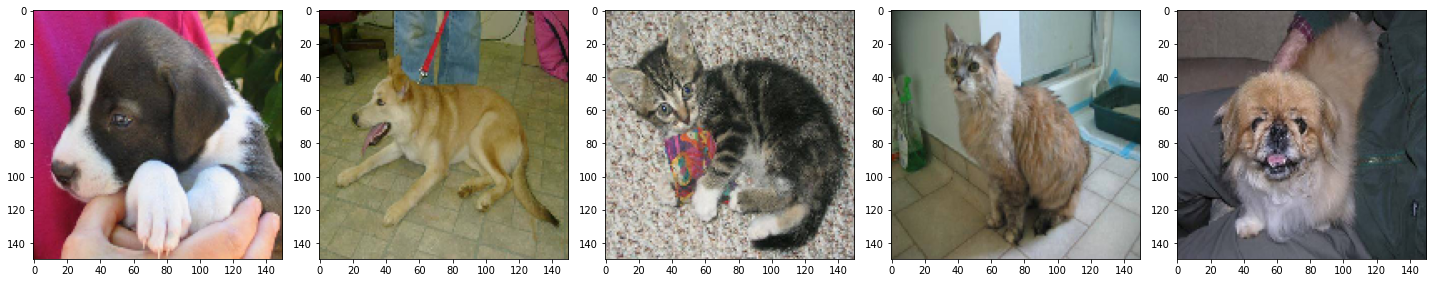

In [ ]:
plotImages(sample_training[:5])

In [36]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(2,activation='softmax')

])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [39]:
history=model.fit_generator(
    generator=train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(100))),
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_val/float(100)))
)

Epoch 1/100
20/20 [==============================] - 9s 450ms/step - loss: 0.6984 - accuracy: 0.4915 - val_loss: 0.6925 - val_accuracy: 0.5160
Epoch 2/100
20/20 [==============================] - 9s 432ms/step - loss: 0.6879 - accuracy: 0.5470 - val_loss: 0.6812 - val_accuracy: 0.5440
Epoch 3/100
20/20 [==============================] - 9s 431ms/step - loss: 0.6744 - accuracy: 0.5865 - val_loss: 0.6631 - val_accuracy: 0.6160
Epoch 4/100
20/20 [==============================] - 9s 430ms/step - loss: 0.6625 - accuracy: 0.6065 - val_loss: 0.6533 - val_accuracy: 0.6320
Epoch 5/100
20/20 [==============================] - 9s 431ms/step - loss: 0.6320 - accuracy: 0.6435 - val_loss: 0.6309 - val_accuracy: 0.6510
Epoch 6/100
20/20 [==============================] - 9s 431ms/step - loss: 0.6135 - accuracy: 0.6705 - val_loss: 0.6339 - val_accuracy: 0.6560
Epoch 7/100
20/20 [==============================] - 9s 435ms/step - loss: 0.5986 - accuracy: 0.6920 - val_loss: 0.6291 - val_accuracy: 0.6490

In [28]:
def plot_acc_loss(history):
  acc=history.history['accuracy']
  test_acc=history.history['val_accuracy']
  loss=history.history['loss']
  test_loss=history.history['val_loss']
  epoch_range=range(100)
  acc_plot(acc,test_acc,epoch_range)
  loss_plot(loss,test_loss,epoch_range)


In [29]:
def acc_plot(acc,test_acc,epoch_range):
  plt.figure(figsize=(16,8))
  plt.plot(epoch_range,acc,label='Training Acc')
  plt.plot(epoch_range,test_acc,label='Test Acc')
  plt.legend(loc='upper right')
  plt.title('training vs test acc')

In [30]:
def loss_plot(loss,test_loss,epoch_range):
  plt.figure(figsize=(16,8))
  plt.plot(epoch_range,loss,label='Training Loss')
  plt.plot(epoch_range,test_loss,label='Test Loss')
  plt.legend(loc='upper right')
  plt.title('training vs test loss')

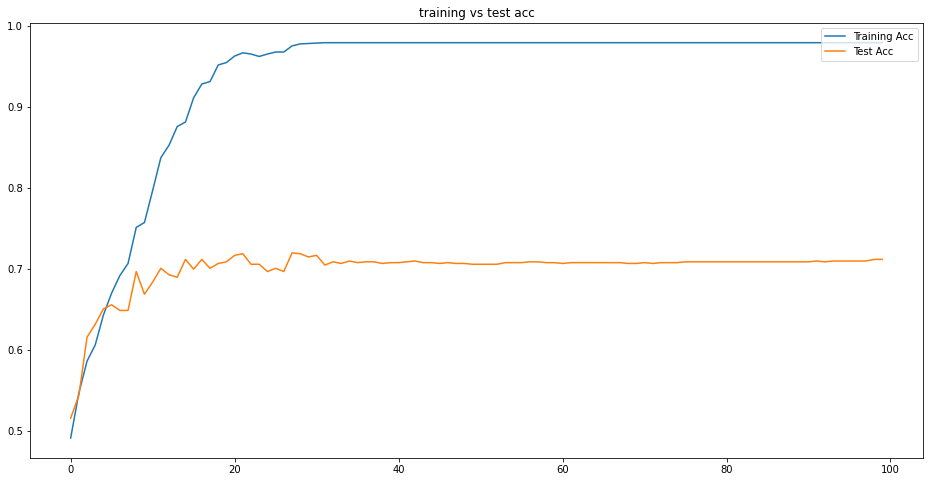

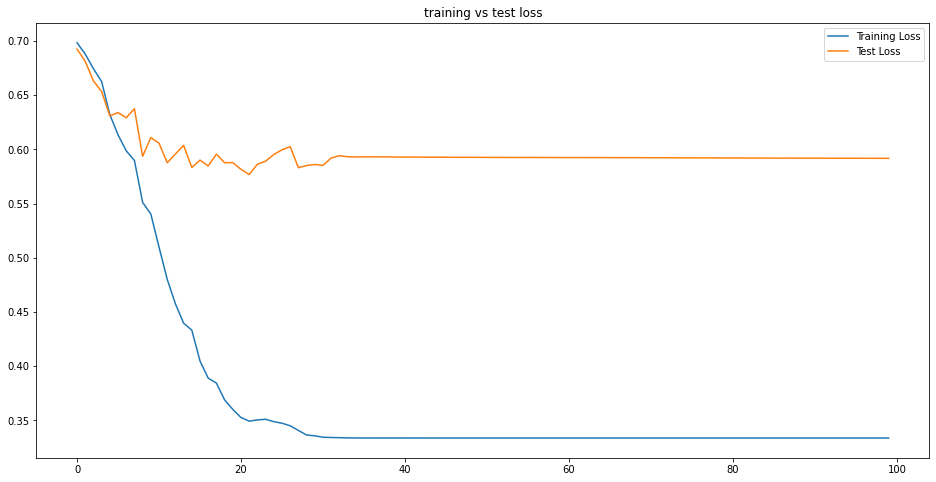

In [40]:
plot_acc_loss(history)

In [17]:
image_gen=ImageDataGenerator(rescale=1./255,
                             horizontal_flip=True,
                             rotation_range=45,
                             zoom_range=0.5,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             fill_mode='nearest')
train_data_gen1=image_gen.flow_from_directory(batch_size=100,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(150,150),
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


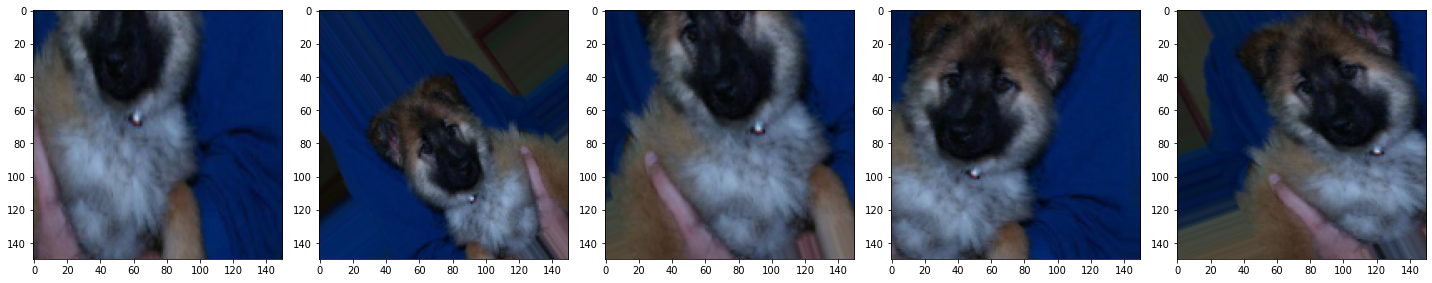

In [18]:
augmented_images=[train_data_gen1[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
image_gen_test=ImageDataGenerator(rescale=1./255)
test_data_gen1=image_gen_test.flow_from_directory(batch_size=100,
                                                  directory=test_dir,
                                                  target_size=(150,150),
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [20]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2)
])

In [21]:
model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [23]:
history=model1.fit_generator(
    generator=train_data_gen1,
    steps_per_epoch=int(np.ceil(total_train/float(100))),
    epochs=100,
    validation_data=test_data_gen1,
    validation_steps=int(np.ceil(total_val/float(100)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 17s 833ms/step - loss: 0.7266 - accuracy: 0.5030 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 17s 845ms/step - loss: 0.6938 - accuracy: 0.5015 - val_loss: 0.6913 - val_accuracy: 0.5260
Epoch 3/100
20/20 [==============================] - 17s 851ms/step - loss: 0.6880 - accuracy: 0.5340 - val_loss: 0.8051 - val_accuracy: 0.5010
Epoch 4/100
20/20 [==============================] - 17s 845ms/step - loss: 0.6945 - accuracy: 0.5320 - val_loss: 0.6907 - val_accuracy: 0.5410
Epoch 5/100
20/20 [==============================] - 17s 847ms/step - loss: 0.6915 - accuracy: 0.5315 - val_loss: 0.6864 - val_accuracy: 0.5550
Epoch 6/100
20/20 [==============================] - 17s 841ms/step - loss: 0.6878 - accuracy: 0.5490 - val_loss: 0.6826 - val_accuracy: 0.5410
Epoch 7/100
20/20 [==============================] - 17s 848

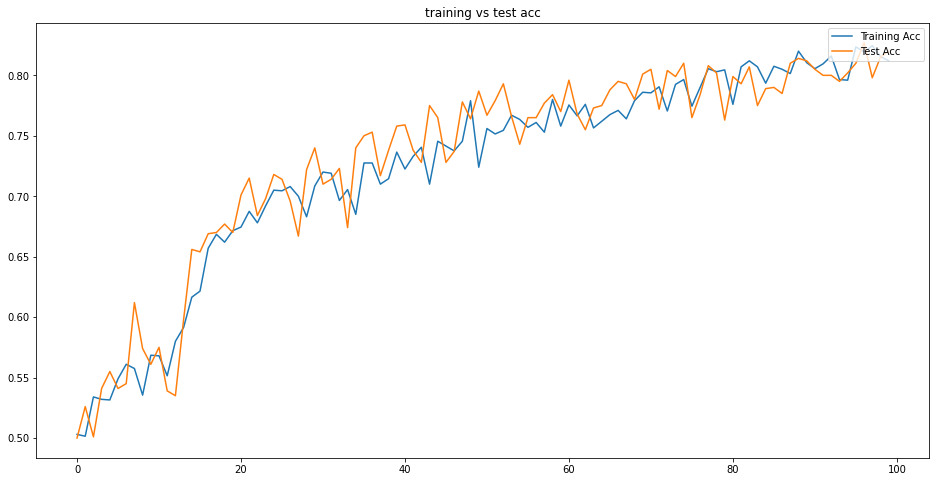

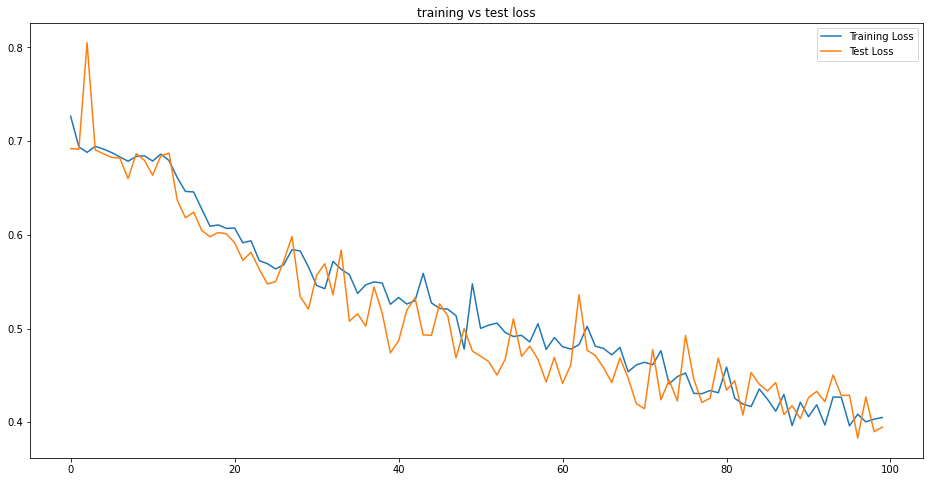

In [31]:
plot_acc_loss(history)